<a href="/assets/lecture03_code.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/lecture03/code.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
הרצאה 3 - Generalization & overfitting
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Markdown

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

## Drive duration prediction

In [ ]:
gt_model = lambda x: 60 + 120 * (1 - 0.5 ** (x / 200))
std = 5

rand_gen = np.random.RandomState(42)
x = rand_gen.randint(0, 1000, 20)
y = gt_model(x) + rand_gen.randn(*x.shape) * std

x_grid = np.arange(0, 1000, 1)
x0 = np.array([500])

### Train-test split

In [ ]:
n_samples = x.shape[0]

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(1)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 80% train / 20% test
n_samples_train = int(n_samples * 0.8)
train_indices = indices[:n_samples_train]
test_indices = indices[n_samples_train:]

x_train = x[train_indices]
y_train = y[train_indices]
x_test = x[test_indices]
y_test = y[test_indices]

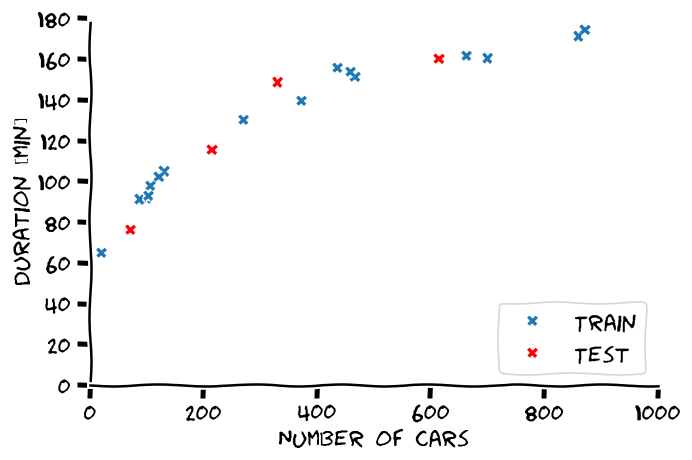

In [ ]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', label='Train', ms=5, mew=2)
    ax.plot(x_test, y_test, 'xr', label='Test', ms=5, mew=2)

    # ax.set_title(f'')
    ax.set_ylabel('Duration [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()
    ax.legend(loc='lower right')
fig.savefig('./output/drive_prediction_train_test.png', dpi=240)

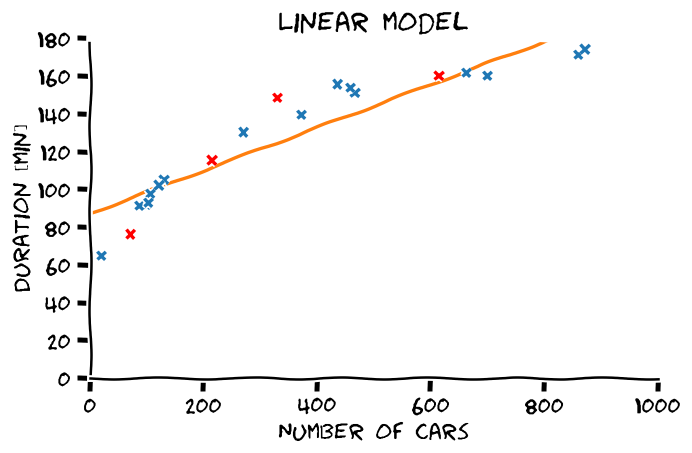

In [ ]:
order = 1
aug_func = lambda x: x[:, None] ** np.arange(order + 1)[None, :]
theta = np.linalg.lstsq(aug_func(x_train), y_train, rcond=None)[0]
h = lambda x: aug_func(x) @ theta

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', label='Train', ms=5, mew=2)
    ax.plot(x_test, y_test, 'xr', label='Test', ms=5, mew=2)
    ax.plot(x_grid, h(x_grid), zorder=-1)

    ax.set_title(f'Linear model')
    ax.set_ylabel('Duration [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()
fig.savefig('./output/drive_prediction_linear.png', dpi=240)

### Evaluation

In [ ]:
y_hat = h(x_train)
train_score = ((y_hat - y_train) ** 2).mean() ** 0.5
display(Markdown(f'The train score (RMSE) of the model is: {train_score:.2f} [min]'))


y_hat = h(x_test)
test_score = ((y_hat - y_test) ** 2).mean() ** 0.5
display(Markdown(f'The test score (RMSE) of the model is: {test_score:.2f} [min]'))

The train score (RMSE) of the model is: 11.34 [min]

The test score (RMSE) of the model is: 15.58 [min]

## Overfitting

The train score (RMSE) of the model is: 0.66 [min]

The test score (RMSE) of the model is: 103.77 [min]

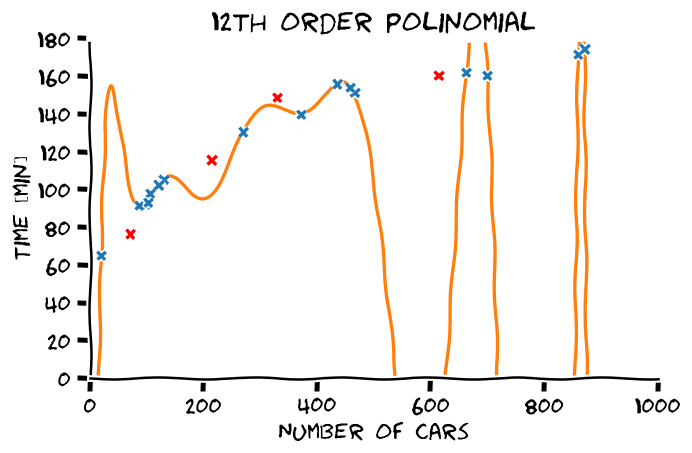

In [ ]:
order = 12
aug_func = lambda x: (x[:, None] / 1000) ** np.arange(order + 1)[None, :]
theta = np.linalg.lstsq(aug_func(x_train), y_train, rcond=None)[0]
h = lambda x: aug_func(x) @ theta

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', label='Train', ms=5, mew=2)
    ax.plot(x_test, y_test, 'xr', label='Test', ms=5, mew=2)
    ax.plot(x_grid, h(x_grid), zorder=-1)

    ax.set_title(f'{order}th order polinomial')
    ax.set_ylabel('Time [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()
fig.savefig('./output/drive_prediction_overfitting.png', dpi=240)

y_hat = h(x_train)
train_score = ((y_hat - y_train) ** 2).mean() ** 0.5
display(Markdown(f'The train score (RMSE) of the model is: {train_score:.2f} [min]'))


y_hat = h(x_test)
test_score = ((y_hat - y_test) ** 2).mean() ** 0.5
display(Markdown(f'The test score (RMSE) of the model is: {test_score:.2f} [min]'))

### Train - validation split

In [ ]:
## Generating a vector of indices
indices = train_indices.copy()

## Shuffle the indices
rand_gen = np.random.RandomState(0)
rand_gen.shuffle(indices)

## Split the indices into 75% train / 25% validation
n_samples_train2 = int(n_samples_train * 0.75)
train2_indices = indices[:n_samples_train2]
val_indices = indices[n_samples_train2:]

x_train2 = x[train2_indices]
y_train2 = y[train2_indices]

x_val = x[val_indices]
y_val = y[val_indices]

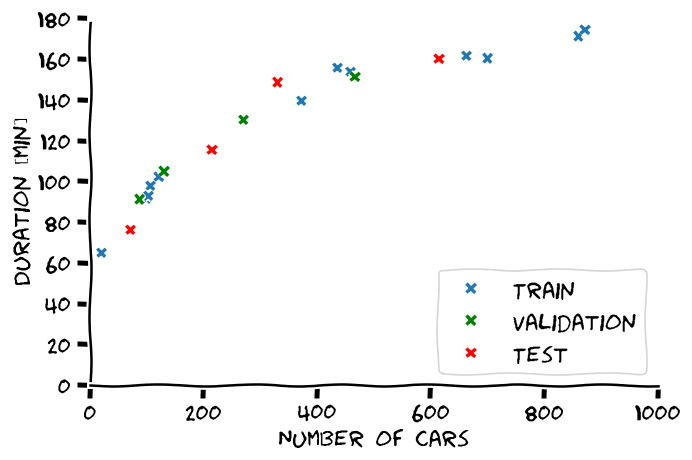

In [ ]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train2, y_train2, 'x', label='Train', ms=5, mew=2)
    ax.plot(x_val, y_val, 'xg', label='Validation', ms=5, mew=2)
    ax.plot(x_test, y_test, 'xr', label='Test', ms=5, mew=2)

    # ax.set_title(f'')
    ax.set_ylabel('Duration [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()
    ax.legend(loc='lower right')
fig.savefig('./output/drive_prediction_train_val_test.png', dpi=240)

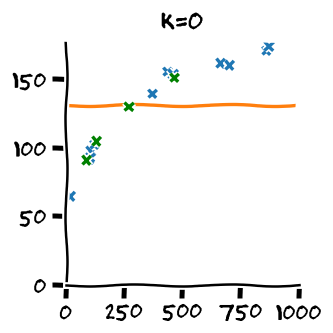

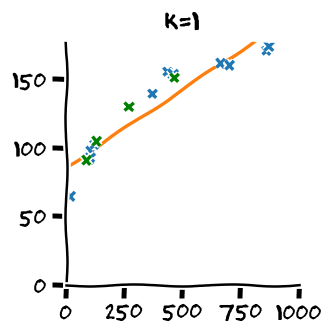

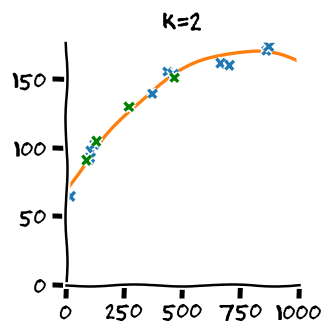

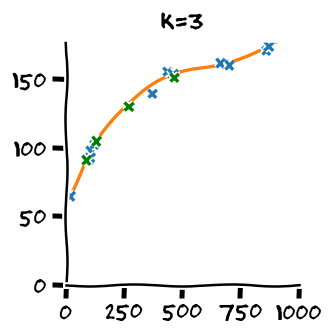

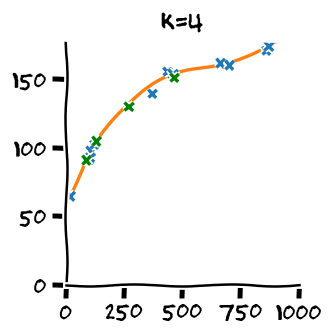

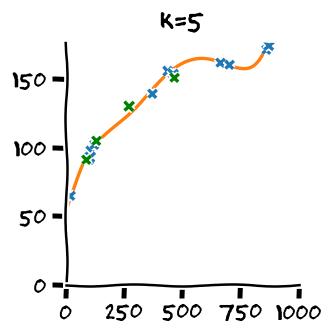

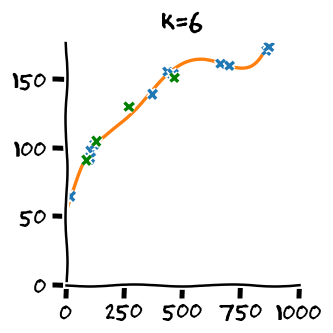

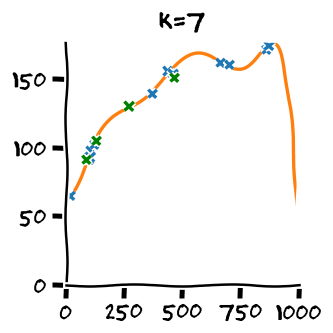

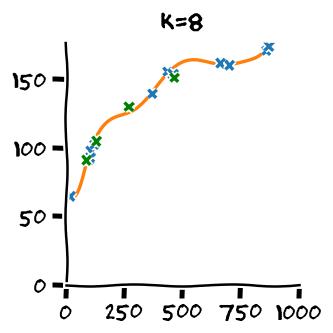

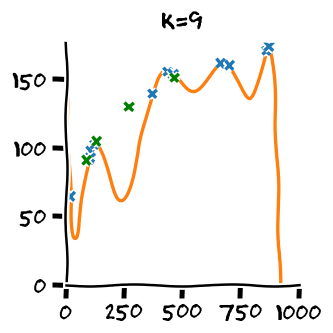

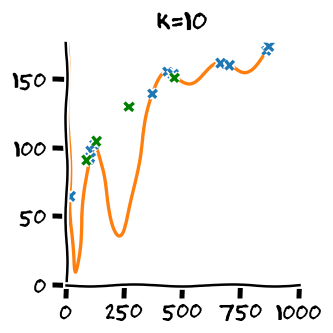

In [ ]:
k_list = np.arange(11)
train_scores = {}
val_scores = {}

for k in k_list:
    aug_func = lambda x: (x[:, None] / 1000) ** np.arange(k + 1)[None, :]
    theta = np.linalg.lstsq(aug_func(x_train2), y_train2, rcond=None)[0]
    h = lambda x: aug_func(x) @ theta
    
    y_hat = h(x_train2)
    train_score = ((y_hat - y_train2) ** 2).mean() ** 0.5
    y_hat = h(x_val)
    val_score = ((y_hat - y_val) ** 2).mean() ** 0.5
    
    train_scores[k] = train_score
    val_scores[k] = val_score
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(3, 3))
        ax.plot(x_train2, y_train2, 'x', label='Train', ms=5, mew=2)
        ax.plot(x_val, y_val, 'xg', label='Validation', ms=5, mew=2)
        ax.plot(x_grid, h(x_grid), zorder=-1)

        ax.set_title(f'k={k}')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.set_xlim(0, 1000)
        ax.set_ylim(0, 180)
        plt.tight_layout()
        fig.savefig(f'./output/drive_prediction_k_{k}.png', dpi=240)

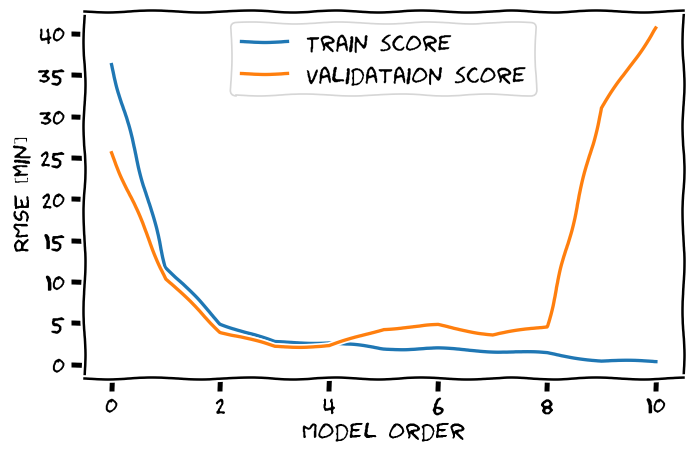

In [ ]:
## Ploting
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(k_list, [train_scores[k] for k in k_list], label='Train score')
    ax.plot(k_list, [val_scores[k] for k in k_list], label='Validataion score')
    ax.set_xlabel('Model order')
    ax.set_ylabel('RMSE [min]')
    # ax.set_ylim(5, 6)
    plt.tight_layout()
    ax.legend();
    fig.savefig('./output/drive_prediction_selecting_order.png', dpi=240)

#### Selecting the order

In [ ]:
best_k = min(k_list, key=val_scores.get)
display(Markdown(f'the optimal order is {best_k}'))

the optimal order is 3

### Retrain the model

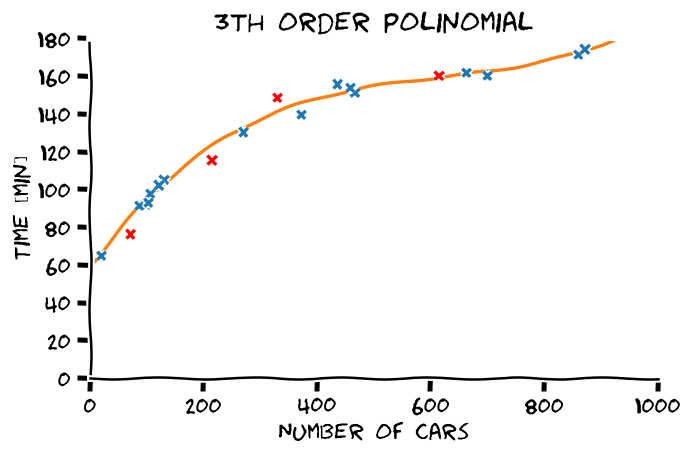

In [ ]:
order = best_k
aug_func = lambda x: (x[:, None] / 1000) ** np.arange(order + 1)[None, :]
theta = np.linalg.lstsq(aug_func(x_train), y_train, rcond=None)[0]
h = lambda x: aug_func(x) @ theta

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', label='Train', ms=5, mew=2)
    ax.plot(x_test, y_test, 'xr', label='Test', ms=5, mew=2)
    ax.plot(x_grid, h(x_grid), zorder=-1)

    ax.set_title(f'{order}th order polinomial')
    ax.set_ylabel('Time [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()
fig.savefig('./output/drive_prediction_final.png', dpi=240)

In [ ]:
y_hat = h(x_train)
train_score = ((y_hat - y_train) ** 2).mean() ** 0.5
display(Markdown(f'The train score (RMSE) of the model is: {train_score:.2f} [min]'))


y_hat = h(x_test)
test_score = ((y_hat - y_test) ** 2).mean() ** 0.5
display(Markdown(f'The test score (RMSE) of the model is: {test_score:.2f} [min]'))

The train score (RMSE) of the model is: 2.53 [min]

The test score (RMSE) of the model is: 6.88 [min]

## Regularization

The train score (RMSE) of the model is: 2.62 [min]

The test score (RMSE) of the model is: 6.83 [min]

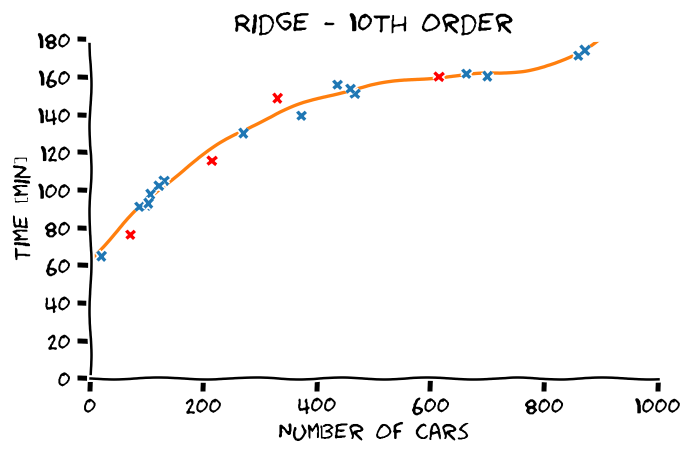

In [ ]:
from sklearn.linear_model import Ridge

order = 10
aug_func = lambda x: (x[:, None] / 1000) ** np.arange(1, order + 1)[None, :]

reg = Ridge(alpha=1e-4, fit_intercept=True, normalize=True, max_iter=1e4)
reg.fit(aug_func(x_train), y_train)
h = lambda x: reg.predict(aug_func(x))

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x_train, y_train, 'x', label='Train', ms=5, mew=2)
    ax.plot(x_test, y_test, 'xr', label='Test', ms=5, mew=2)
    ax.plot(x_grid, h(x_grid), zorder=-1)

    ax.set_title(f'Ridge - {order}th order')
    ax.set_ylabel('Time [min]')
    ax.set_xlabel('Number of cars')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 180)
    plt.tight_layout()
fig.savefig('./output/drive_prediction_ridge.png', dpi=240)

y_hat = h(x_train)
train_score = ((y_hat - y_train) ** 2).mean() ** 0.5
display(Markdown(f'The train score (RMSE) of the model is: {train_score:.2f} [min]'))

# y_hat = h(x_val)
# val_score = ((y_hat - y_val) ** 2).mean() ** 0.5
# display(Markdown(f'The validation score (RMSE) of the model is: {val_score:.2f} [min]'))

y_hat = h(x_test)
test_score = ((y_hat - y_test) ** 2).mean() ** 0.5
display(Markdown(f'The test score (RMSE) of the model is: {test_score:.2f} [min]'))